In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [8]:
# 首先准备数据集
# 特征向量
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]]) # 自定义的数据集
# 标记
y = [0, 1, 1, 0, 0, 1, 1, 0]

# 由于标记中只含有两类，故而将特征向量按照标记分割成两部分
class_0=np.array([feature for (feature,label) in zip(X,y) if label==0])
print(class_0) # 确保没有问题
class_1=np.array([feature for (feature,label) in zip(X,y) if label==1])
print(class_1)

# 划分也可以采用如下方法：两个打印后结果一样
# class_0=np.array([X[i] for i in range(len(X)) if y[i]==0])
# print(class_0)
# class_1=np.array([X[i] for i in range(len(X)) if y[i]==1])
# print(class_1)

[[ 3  1]
 [ 6  4]
 [ 5  2]
 [ 4 -1]]
[[2 5]
 [1 8]
 [3 5]
 [4 7]]


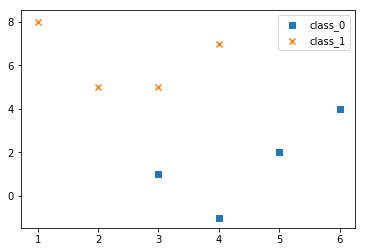

In [11]:
# 在图中画出这两个不同类别的数据集，方便观察不同类别数据的特点
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],marker='s',label='class_0')
plt.scatter(class_1[:,0],class_1[:,1],marker='x',label='class_1')
plt.legend()

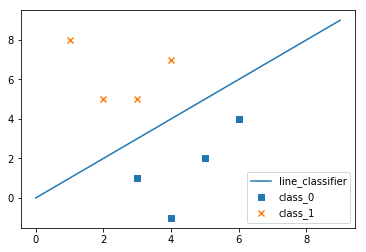

In [12]:
# 构建一个简单的线性分类器
# 从上面图中可以看出，可以画一条直线轻松的将class_0和class_1两个数据点分开
# 其实有很多直线可以起到分类器的效果，此处我们只用最简单的y=x作为演示
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],marker='s',label='class_0')
plt.scatter(class_1[:,0],class_1[:,1],marker='x',label='class_1')
plt.plot(range(10),range(10),label='line_classifier') # 此处x=range(10), y=x
plt.legend()

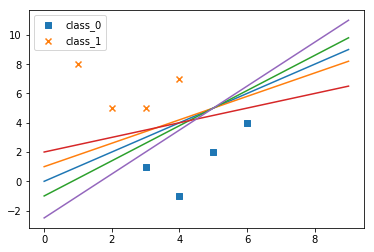

In [25]:
# 实际上，由于这个数据集的样本数太少，有非常多的直线可以作为分类器
# 如下的所有直线都可以将这两个样本数据分开
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],marker='s',label='class_0')
plt.scatter(class_1[:,0],class_1[:,1],marker='x',label='class_1')
plt.plot(range(10),range(10))
plt.plot(range(10),0.8*np.array(range(10))+1)# 此处x=range(10), y=ax+b
plt.plot(range(10),1.2*np.array(range(10))-1)# 此处x=range(10), y=ax+b      
plt.plot(range(10),0.5*np.array(range(10))+2)# 此处x=range(10), y=ax+b      
plt.plot(range(10),1.5*np.array(range(10))-2.5)# 此处x=range(10), y=ax+b      
# 这么多直线都可以作为分类器，那么肯定有一个最优解的问题，如何找到最优直线？
plt.legend()

In [31]:
# 上面虽然随机的选择了一条直线（y=x）作为分类器，但很多时候我们不知道分类
# 下面构建一个SGD分类器，它使用随机梯度下降法来训练
# 训练之前需要对数据进行标准化，保证每个维度的特征数据方差为1，均值为0，避免某个特征值过大而成为影响分类的主因
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X) # 由于本项目数据集太少，故而全部用来train

# 构建SGD分类器进行训练
from sklearn.linear_model import SGDClassifier
sgdClassifier=SGDClassifier(random_state=42)
sgdClassifier.fit(X_train,y) # y作为label已经是0,1形式，不需进一步处理

# 使用训练好的SGD分类器对陌生数据进行分类
X_test=np.array([[3,2],[2,3],[2.5,2.4],[2.4,2.5],[5,8],[6.2,5.9]])
X_test=ss.fit_transform(X_test) # test set也要记过同样的处理
test_predicted=sgdClassifier.predict(X_test)
print(test_predicted)


[0 1 1 1 1 0]


e:\programsoft\python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\programsoft\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
